<a href="https://colab.research.google.com/github/mhtattersall/LinearRegression/blob/main/House_Price_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Predicting House Prices with Linear Regression**

**Michael Tattersall**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project demonstrates data analysis and data cleaning techniques with a linear regression model.  

We experiment by training different linear regression models to predict house prices.

The independent variables are sets of features of houses, and the dependent target variable is the actual recorded price of houses sold in the market place.

The best trained model is tested against unseen data.  

This model achieves an R-Squared score of 0.816, which indicates a high proportion of the variance in target variable is explained by the trained linear regression model.

[Back to top](#Index)


## 1. Introduction

The necessary libraries for the project are numpy, pandas, matplotlib and scikit-learn.

From the **numpy** library, we will use:
* the log() function to compute the natural logarithm element-wise of a pandas Series
* the exp() function to transform natural logarithm values into real values

We will use **pandas** DataFrames to store our data in-memory. We will use:
* the skew() function to compute the skewness of a distribution
* the interpolate () method to fill in missing values in a DataFrame
* the select_dtypes() method to select columns based on their data type
* the corr() function to compute the pairwise correlation coefficient between pairs of columns in a DataFrame
* the isnull() method to check for missing values
* the dropna() method to drop columns with missing values
* the iloc[] function to seleect data
* the mean() function to calculate the mean average of a Series
* the fillna() method to fill missing values in a Series

We will use **matplotlib** for visualisation.  We will use:
* the plt.hist() function to plot histograms
* the plt.scatter() function to create scatter plots
* the plt.bar() function to create a bar chart

From the **scikit-learn** module we will use:
* the linear regression model
* the fit() function to train the model
* the predict() function to generate predictions from a trained model   
* the score() function to compute the coefficent of determination (R-squared) of a model

A training dataset of house price features and actual sales prices will be loaded into a pandas DataFrame and be analysed and cleaned.

The features of houses are the independent variables, which are used to predict a dependent (or target) variable, which is the sales price of a house (the SalePrice column). The features used in the linear regression model are those columns in the training dataset with numeric datatypes, which have the strongest correlation coefficients with the SalePrice column.

Different models will be trained by experimenting with various groups of features and by alternating the SalePrice between real money values and the natural logarithm values. The most accurate trained model will be tested against unseen test data.



[Back to top](#Index)

## 2. The Data

The data is a subset of a housing dataset.  The dataset contains columns that describe the features of houses and the sales price of houses sold between the years 2006 and 2010.  

[Back to top](#Index)

### 2.1 Import the Data

The training data is 100 rows x 82 columns of house price data, including the SalePrice column (the dependent variable) and 79 columns of house features (dependent variables) and 2 index columns.  The training data is used to train various linear regression models.

The test data is a further set of 100 rows x 82 columns of house price data.  It is unseen data used to test a trained linear regression model.

Taken together the datasest is 200 rows x 82 columns of house price data and the train/test split is 50:50.

The necessary libraries and data for the project are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

The datasets are loaded into local memory.

In [2]:
train_data = pd.read_csv("/content/sample_data/houseSmallData.csv")
test_data = pd.read_csv("/content/sample_data/jtest.csv")

The shape and head of DataFrames for the train and test data are viewed.

In [3]:
train_data.shape

(100, 82)

In [4]:
train_data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.shape

(100, 82)

In [6]:
test_data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


[Back to top](#Index)

### 2.2 Data Exploration

We explore the dependent variable column, SalePrice, which is the money value of an actual house price sale.  

SalePrice has 100 data points, which range between 40,000 and 438,750, with a mean of 173,821 and standard deviation of 72,237.

In [7]:
salePrice = train_data['SalePrice'] # extract SalePrice column as a Series from the train_data DataFrame
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

We view the distribution of the SalePrice column in a histogram using the matplotlib hist() function.

This distribution appears to be significantly skewed and to be log-normal like.

A log-normal distribution is a probability distribution of a random variable whose logarithm is normally distributed.

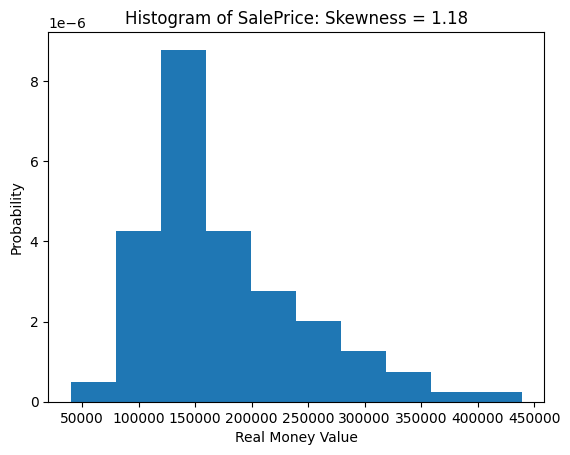

In [8]:
plt.hist(salePrice,density=True) # create a histogram of SalePrice Series
plt.title('Histogram of SalePrice: Skewness = 1.18')
plt.xlabel('Real Money Value')
plt.ylabel('Probability')
plt.show()

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.  

We use the pandas skew() function to calculate that the SalePrice column has a skewness of 1.18.  

If skewness is less than -1 or greater than 1, the distribution is generally thought to be highly skewed.   

In [9]:
salePrice.skew()

1.1783462304851948

We use the numpy log() function to transform the SalePrice column.

The natural logarithm of SalePrice appears to be normally distributed and its skewness is reduced to -0.1, which demonstrates the distribution is approximately symmetric.

This logarithmic transformation may improve the performance of the linear regression.  When logarithmic values are predicted by our trained model they can be transformed into real money values using the numpy exponential function exp().

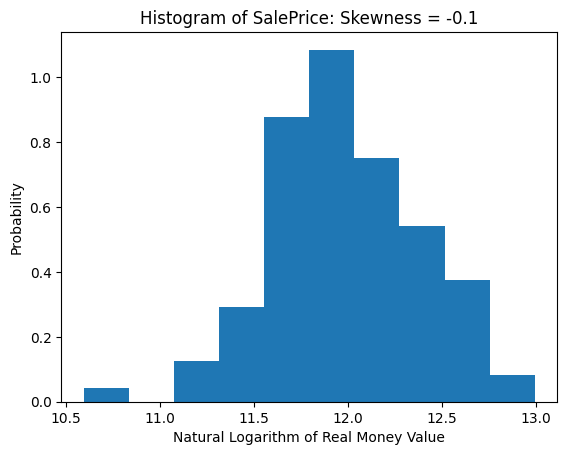

In [10]:
plt.hist(np.log(salePrice),density=True) # create a histogram of natural log of SalePrice Series
plt.title('Histogram of SalePrice: Skewness = -0.1')
plt.xlabel('Natural Logarithm of Real Money Value')
plt.ylabel('Probability')
plt.show()

In [11]:
np.log(salePrice).skew()

-0.09632240207755555

The natural logarithm of the Sale Price column is saved as the 'Y-log' variable.

In [12]:
Y_log = np.log(salePrice)

[Back to top](#Index)

### 2.3 Data Preparation

There are 40 columns with a numeric data type, which are the independent variables most suited to predicting the depedent variable.  

There are 3 columns in the training dataset that contain at least one missing value. To repair these columns, we will use the pandas interpolate method to fill the missing values.  The missing values are filled in by linearly interpolating between neighboring non-missing values.

We can drop the first two columns, which are id columns, and not real features of houses.

We can view the distributions of the remaining interpolated numeric columns by producing histograms.

In [13]:
numeric = train_data.select_dtypes(include=[np.number]) # select the columns from the train_data DataFrame with numeric values
numeric.shape

(100, 40)

In [14]:
sum(numeric.isnull().sum() != 0) # check how many of numeric columns contain null values

3

In [15]:
interpolated = numeric.select_dtypes(include=[np.number]).interpolate().dropna(axis=1) # perform interpolation on numeric columns
# drop and columns that still contain missing values after interpolation
interpolated

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,73.5,9765,6,8,1993,1993,68.0,...,232,63,0,0,0,0,480,4,2009,185000
96,96,97,20,78.0,10264,7,5,1999,1999,183.0,...,158,29,0,0,0,0,0,8,2006,214000
97,97,98,20,73.0,10921,4,5,1965,1965,48.0,...,120,0,0,0,0,0,0,5,2007,94750
98,98,99,30,85.0,10625,5,5,1920,1950,0.0,...,0,0,77,0,0,0,400,5,2010,83000


In [16]:
chart_cols = interpolated.iloc[:,2:38] # drop the first two columns in the interpolated DataFrame and the SalePrice column
chart_cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,73.5,9765,6,8,1993,1993,68.0,310,0,...,420,232,63,0,0,0,0,480,4,2009
96,20,78.0,10264,7,5,1999,1999,183.0,1162,0,...,472,158,29,0,0,0,0,0,8,2006
97,20,73.0,10921,4,5,1965,1965,48.0,520,0,...,432,120,0,0,0,0,0,0,5,2007
98,30,85.0,10625,5,5,1920,1950,0.0,108,0,...,366,0,0,77,0,0,0,400,5,2010


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

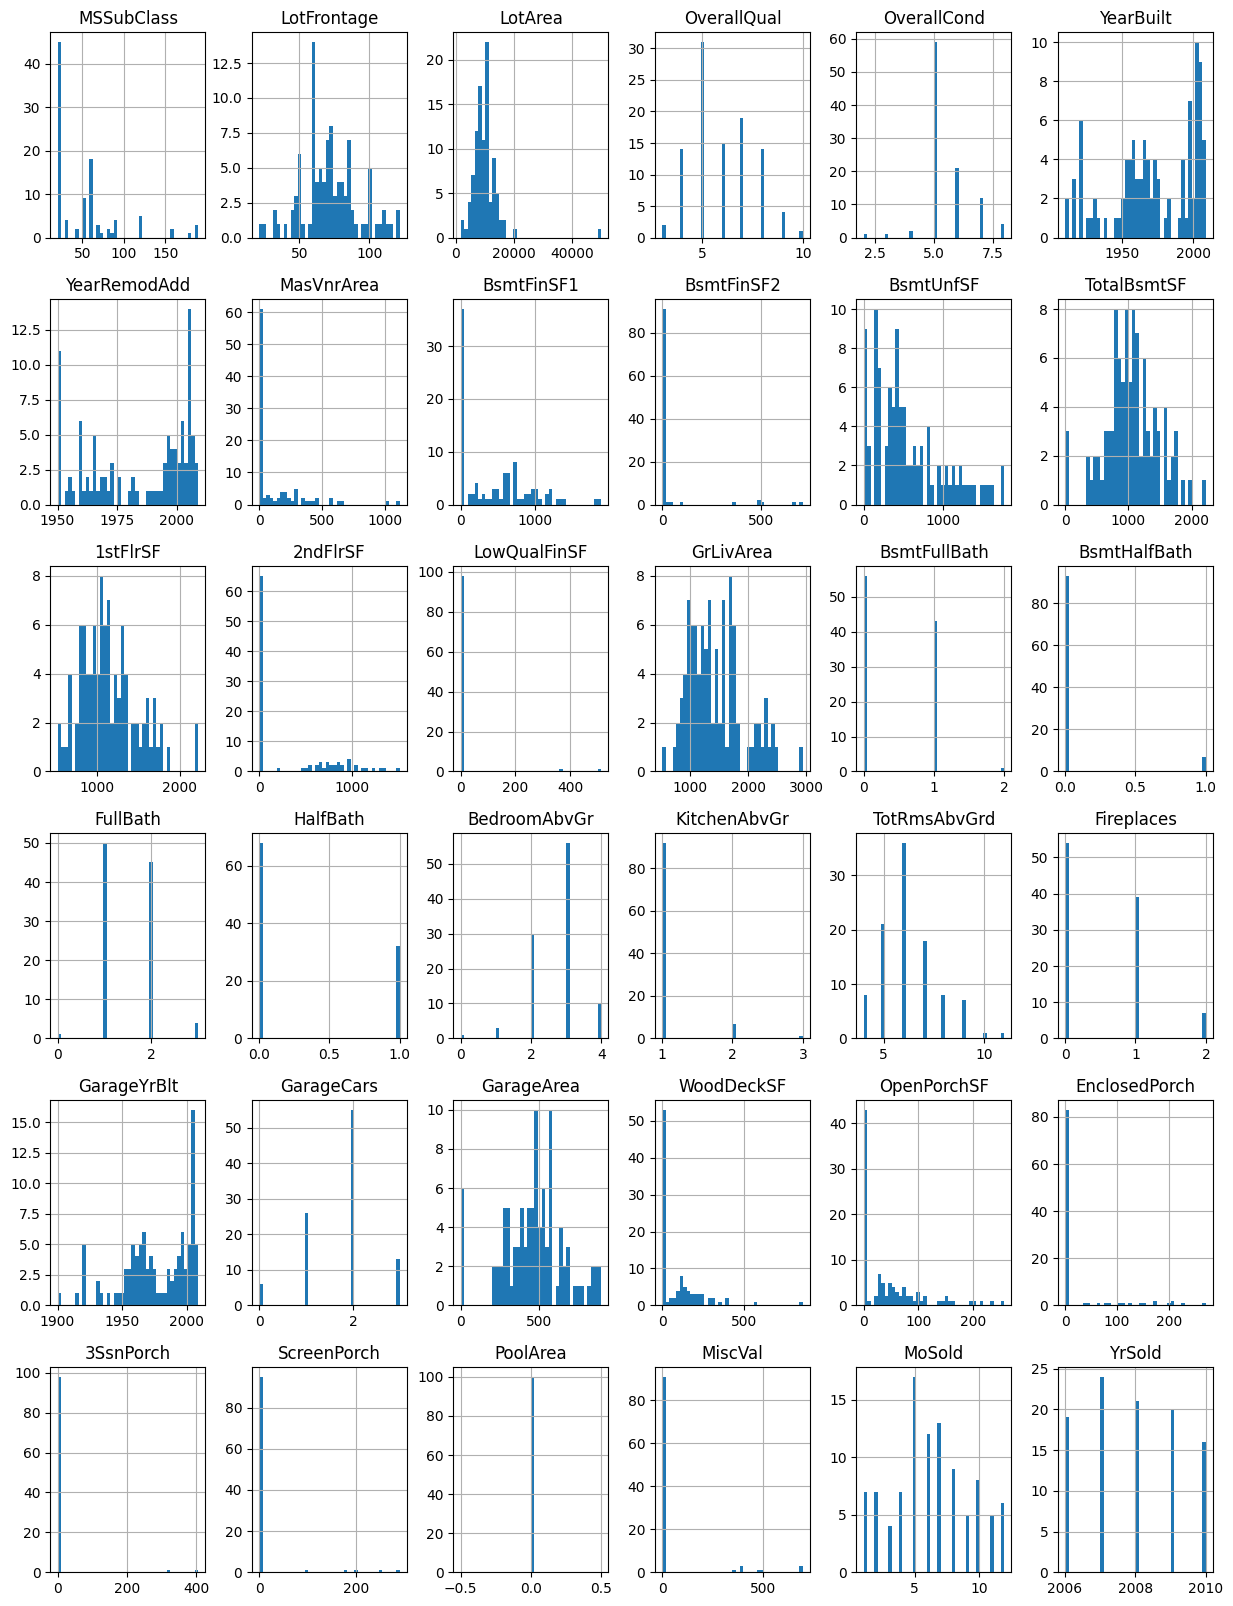

In [17]:
chart_cols.hist(figsize = (15,20), bins=40, xlabelsize =10, ylabelsize=10) # create histograms of each column with numeric datatypes

[Back to top](#Index)

### 2.4 Correlation

We use the pandas corr() function to calculate the correlation coefficient between every pair of columns in the 'interpolated' DataFrame. We isolate the SalePrice column in the 'corr_interpolated' DataFrame and examine the top 12 correlation coefficients, not including the fact SalePrice is perfectly correlated with itself.

We store the index headers of the top 5 columns, the top 8 columns and the top 12 columns in new variables, 'cols_top_5', 'cols_top_8' and 'cols_top_12' for later use.

In [18]:
corr_interpolated = interpolated.corr() # calculate the correlation coefficients in the interpolated DataFrame
chart_corr = corr_interpolated['SalePrice'].sort_values(ascending=False)[0:13] # view the columns with the top 13 correletion coefficients
chart_corr

SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.589361
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
1stFlrSF        0.550912
YearRemodAdd    0.548330
Name: SalePrice, dtype: float64

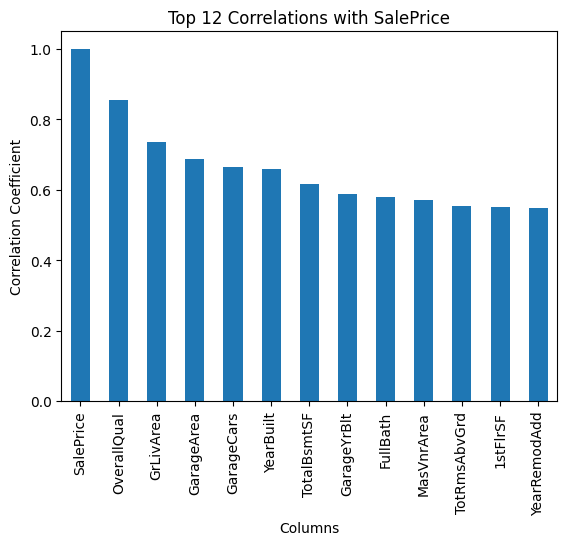

In [19]:
chart_corr.plot.bar() # create bar chart to show the 12 correlation coefficients
plt.title('Top 12 Correlations with SalePrice')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

In [20]:
cols_top_5 = corr_interpolated['SalePrice'].sort_values(ascending=False)[0:6].index # store index labels for top 5 ranked columns
cols_top_8 = corr_interpolated['SalePrice'].sort_values(ascending=False)[0:9].index # store index labels for top 8 ranked columns
cols_top_12 = corr_interpolated['SalePrice'].sort_values(ascending=False)[0:13].index # store index labels for top 12 ranked columns
cols_top_5, cols_top_8, cols_top_12

(Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
        'YearBuilt'],
       dtype='object'),
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
        'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath'],
       dtype='object'),
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
        'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
        'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd'],
       dtype='object'))


[Back to top](#Index)

## 3. Project Description

We will recreate the analysis performed by Dr. Williams in the MIT xPro Professional Certificate in Data Engineering lectures.  

We will then experiment by training different models.  We will alter Dr.Williams' analysis by using natural logarithm values of SalePrice as the target instead of real money values.

We will then train models with sets of 8 features and 12 features respectively from our training dataset and vary the target variable between real money values and the natural logarithm of these values.

An R-Squared score of each model will be calculated. The objective is to improve upon Dr. Williams's result. The most accurate trained model will be tested against unseen data.

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The theory of linear regression has its origins in the method of least squares, which was developed independently by Carl Friedrich Gauss and Adrien-Marie Legendre in the early 19th century.

In the context of machine learning, linear regression is a supervised learning algorithm used for regression tasks, where the goal is to predict continuous numeric outcomes.

The method aims to find the line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values. Linear regression assumes a linear relationship between the independent variables (features) and the dependent variable (target).

The mathematical representation for multiple linear regression with $n$ independent variables is:

>$y= b_{0} +b_{1}x_{1} +b_{2}x_{2} + … +b_{n}x_{n}$

Where:

* $b_{0}$ is the intercept
* $b_{1},b_{2},…,b_{n}$  are the coefficients for each independent variable
* $x_{1},x_{2},…,x_{n}$  are the values of the independent variables

The goal of linear regression is to estimate the coefficients that minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Using Python, scikit-learn provides an efficient implementation of linear regression using the method of Ordinary Least Squares. The specific functions we use are:

* the fit() function to train the model on the training data
* the predict() function to generate predictions from the trained model
* the score() function to compute the coefficent of determination (R-squared) of the model, which indicates the proportion of the variance in the target variable that is explained by the trained linear regression model.

In each case X is a set of independent variables and Y is the dependent variable.

[Back to top](#Index)

### 3.2 Analysis







First, we will train a model with a set of the top 5 most correlated features as the independent variables and the real money values of SalePrice as the dependent variable.  

We will then experiment by training different models.  We will alter the original analysis by using the natural logarithm of the SalePrice as the target variable instead of the real money values.

Secondly, we will train a model with an extended set of 8 features from our dataset and vary the target variable between real money values and the natural logarithm of these values.

Thirdly, we will train a model with a further extended set of 12 features from our dataset and vary the target variable between real money values and the natural logarithm of these values

An R-Squared score of each model will be calculated. The objective is to improve upon Dr. Williams's result. The most accurate trained model will be tested against unseen data.

####**First Model**

In this model, we use a set of 5 features that are those with the highest correlation coefficients with the SalePrice target variable.

In [21]:
X_1 = interpolated[cols_top_5] # set X variable using the stored cols_top_5 column index labels from the interpolated dataset
Y_real = X_1['SalePrice'] # set the Y variable using the SalePrice column index label
X_1 = X_1.drop(['SalePrice'], axis=1) # drop the SalePrice data from the X variable
X_1 # view the X variable

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


We create a linear regression model class object using the scikit module. The R-Squared score of the model is 0.831.

In [22]:
lr = linear_model.LinearRegression() # create the linear regression object
model_1_real = lr.fit(X_1, Y_real) # train the model with training data
predictions_1_real = model_1_real.predict(X_1) # store the model predictions
print(f"Model 1 with real money values R^2 is: {model_1_real.score(X_1,Y_real)}") # print the R-squared score of the model

Model 1 with real money values R^2 is: 0.8309859964337731


It is expected that the error of Model 1 (the actual SalePrice values minus the predictions generated by the model) should look like a normal distribution and it does.

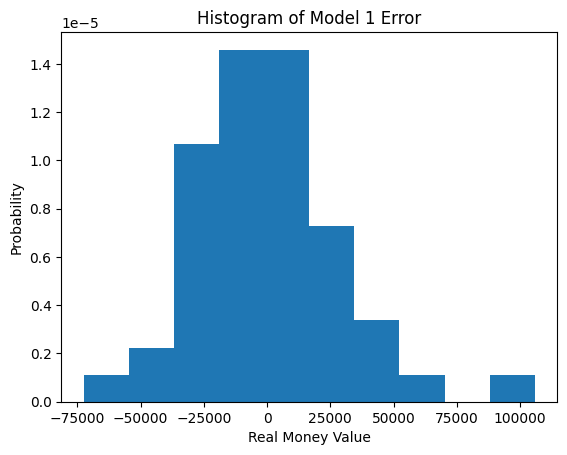

In [23]:
plt.hist(Y_real - predictions_1_real, density=True) # create a histogram of the model error
plt.title('Histogram of Model 1 Error')
plt.xlabel('Real Money Value')
plt.ylabel('Probability')
plt.show()

The scatterplot of the model's predicted values (x-axis) and the actual SalePrice in real money values (y-axis) demonstrates how well the model's predictions align with the actual observed values.  Model 1 appears to be well-fitted as the points cluster closely aroung a diagonal line, indicating the predicted values closely match the actual values.

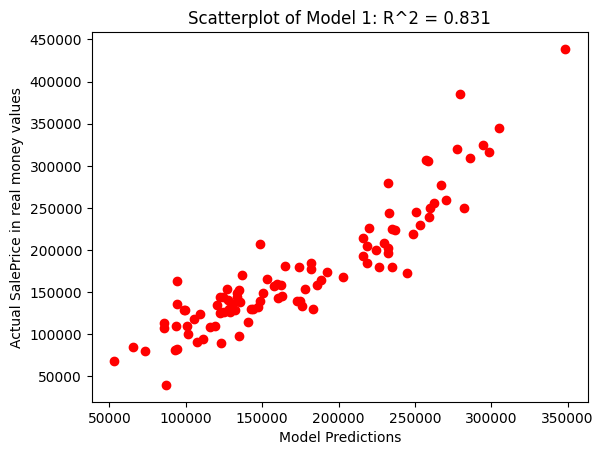

In [24]:
plt.scatter(predictions_1_real, Y_real, color ='r') # create a scatterplot with the model predicitons (x) and the actual values (y)
plt.title('Scatterplot of Model 1: R^2 = 0.831')
plt.xlabel('Model Predictions')
plt.ylabel('Actual SalePrice in real money values')
plt.show()

We now introduce natural logartihm values of SalePrice as the target variable.  The R-Squared result of 0.823 is less than the 0.831 result achieved when using SalePrice real money values as the target variable.

In [25]:
model_1_log = lr.fit(X_1, Y_log) # train the model with training data
print(f"Model 1 with natural log values R^2 is: {model_1_log.score(X_1,Y_log)}") # print the R-squared score of the model

Model 1 with natural log values R^2 is: 0.8234260890762958


####**Second Model**

In this model we train a model with an extended set of 8 features from our dataset and vary the target variable between real money values and the natural logarithm of these values.

The R-Squared result of the model with real money values as the target variable is is 0.851.  

The R-Squared result of the model with natural logarithm values as the target variable is 0.852.

In [26]:
X_2 = interpolated[cols_top_8] # set X variable using the stored cols_top_8 column index labels from the interpolated dataset
X_2 = X_2.drop(['SalePrice'], axis=1) # drop the SalePrice data from the X variable
model_2_real = lr.fit(X_2, Y_real) # train the model with training data
print(f"Model 2 with real money values R^2 is: {model_2_real.score(X_2,Y_real)}") # print the R-squared score of the model
model_2_log = lr.fit(X_2, Y_log) # train the model with training data
print(f"Model 2 with natural log values R^2 is: {model_2_log.score(X_2,Y_log)}") # print the R-squared score of the model

Model 2 with real money values R^2 is: 0.8508305344209256
Model 2 with natural log values R^2 is: 0.8522985578542368


####**Third Model**

In this model we train a model with a further extended set of 12 features from our dataset and vary the target variable between real money values and the natural logarithm of these values.

The R-Squared result of the model with real money values as the target variable is is 0.856.  

The R-Squared result of the model with natural logarithm as the target variable is 0.860.

In [27]:
X_3 = interpolated[cols_top_12] # set X variable using the stored cols_top_12 column index labels from the interpolated dataset
X_3 = X_3.drop(['SalePrice'], axis=1) # drop the SalePrice data from the X variable
model_3_real = lr.fit(X_3, Y_real) # train the model with training data
print(f"Model 3 with real money values R^2 is: {model_3_real.score(X_3,Y_real)}") # print the R-squared score of the model
model_3_log = lr.fit(X_3, Y_log) # train the model with training data
print(f"Model 3 with natural log values R^2 is: {model_3_log.score(X_3,Y_log)}") # print the R-squared score of the model

Model 3 with real money values R^2 is: 0.855941653460925
Model 3 with natural log values R^2 is: 0.8602811685978128


[Back to top](#Index)

### 3.3 Results

The scikit-learn implementation of linear regression uses the method of Ordinary Least Squares to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

The score() function computes the coefficent of determination (R-squared) of the model, which indicates the proportion of the variance in the target variable that is explained by the trained linear regression model.  

The coefficient of determination $R^2$ is defined as:

>${1-\frac{u}{v}}$

where:

* $u$ is the residual sum of squares, which represents the unexplained variability in the dependent variable by the regression model. It is calculated as the sum of squared differences between each observed value of $y$ and its corresponding predicted value $\hat{y}$ from the regression model.
* $v$ is the total sum of squares, which represents ths total variability in the dependent variable. It is calculated as the sum of squared differences between each observed value of $y$ and the mean of $y$.

The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

The results of the various trained models are shown below.

Model                           | Score
--------------------------------|-----------------------
Model 1 with real money values  | 0.831
Model 1 with natural log values | 0.823
Model 2 with real money values  | 0.851
Model 2 with natural log values | 0.852
Model 3 with real money values  | 0.856
Model 3 with natural log values | 0.860

The model with the highest R-Squared score is Model 3 with natural log values.  This model performed the best intuitively because it includes the highest number of features (12) with strong correlation coefficeints with the SalePrice target variable.

The use of natural logarithm of SalePrice as the target value reduces the skewness of the distribution of the SalePrice Series and this appears to have contributed to slighty increased performance of Model 3.  

The uses of natural logarithm values improved the performanc of Model 2, but did not improve the performance of Model 1.

We now further analyse our best performing model, Model 3 with natural log values.

It is expected that the error of Model 3 model should look like a normal distribution and it does.

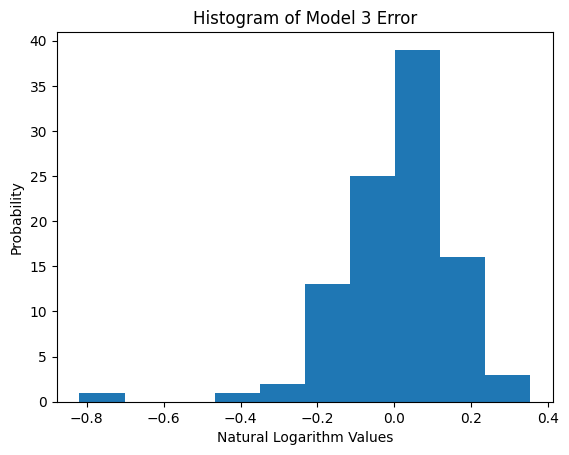

In [28]:
predictions_3_log = model_1_log.predict(X_3) # store the model predictions
plt.hist(Y_log - predictions_3_log) # create a histogram with the model error
plt.title('Histogram of Model 3 Error')
plt.xlabel('Natural Logarithm Values')
plt.ylabel('Probability')
plt.show()

The scatterplot of Model 3's predicted values (x-axis) and the actual SalePrice in real money values (y-axis) demonstrates the model's predictions align with the actual observed values. Model 3 appears to be well-fitted as the points cluster closely aroung a diagonal line, indicating the predicted values closely match the actual values.

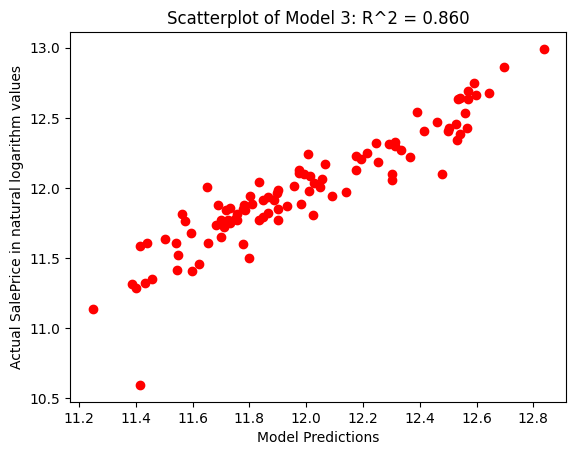

In [29]:
plt.scatter(predictions_3_log, Y_log, color ='r') # create a scatterplot with the model predicitons (x) and the actual values (y)
plt.title('Scatterplot of Model 3: R^2 = 0.860')
plt.xlabel('Model Predictions')
plt.ylabel('Actual SalePrice in natural logarithm values')
plt.show()

When logarithmic values are predicted by our trained model they can be transformed into real values using the numpy exponential function exp() as demonstrated below.

In [30]:
predictions_3_real = np.exp(predictions_3_log)
predictions_3_real

array([201548.75443563, 158934.29895738, 217532.11262773, 147382.21674674,
       269474.12458507, 152385.21695298, 277737.81321584, 197760.87714407,
       147521.99291856, 108363.29174454, 127484.9836901 , 294324.00459448,
       119144.40803161, 240396.79093653, 146941.90749835, 139999.22473942,
       140063.77386706, 108717.60929534, 164483.08949883, 131172.53211165,
       288176.03677216, 122600.15908689, 276683.2327756 , 137752.9736608 ,
       133702.14206929, 275474.4463839 , 127399.90295839, 287421.99431288,
       163710.94258445,  76758.53302571,  90723.34250093, 145123.74381844,
       220422.38456258, 156164.9344402 , 284698.19395232, 279566.15285813,
       159650.07456333, 142449.31465796, 130363.26103493,  88139.14541632,
       147560.90762846, 138095.96636931, 130950.27628467, 126810.210613  ,
       124558.52779459, 309778.57687239, 279780.44013018, 286695.38563215,
        98995.44228165, 121351.61917225, 165041.21131465, 120668.37075513,
       115267.10679976, 3

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that we have our most accurate predictive model, we will test the model against unseen test data to confirm its accuracy.



We create a test_X dataset from the 'test_data' previoulsy loaded into memory and select the same set of 12 columns used as independent variables in our predictive model.

In [31]:
test_X = test_data[cols_top_12] # set X variable using the stored cols_top_12 index labels from the test dataset
test_X # view the X variable data

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd
0,205000,6,1610,480,2,1977,1610,1977.0,2,28.0,6,1610,2001
1,178000,6,1732,476,2,1985,741,1985.0,2,336.0,7,977,1985
2,118964,5,1535,410,2,1979,0,1979.0,2,0.0,8,1535,1979
3,198900,7,1226,740,3,2009,1226,2009.0,2,0.0,6,1226,2009
4,169500,7,1818,240,1,1931,1040,1951.0,1,600.0,7,1226,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,148500,6,1456,440,2,1976,855,1976.0,2,0.0,7,855,1976
96,311872,7,1726,786,3,2007,1726,2007.0,2,205.0,8,1726,2007
97,235000,8,3112,795,2,1918,1360,1918.0,2,0.0,8,1360,1990
98,104000,6,2229,0,0,1912,755,NaN,1,0.0,8,929,1950


We check our test_X dataset in case there are any columns with null values, and we find there are 9 missing values in the column 'GarageYrBlt'.

In [32]:
null_cols=pd.DataFrame(test_X.isnull().sum().sort_values(ascending=False))
null_cols

,0
GarageYrBlt,9
SalePrice,0
OverallQual,0
GrLivArea,0
GarageArea,0
GarageCars,0
YearBuilt,0
TotalBsmtSF,0
FullBath,0
MasVnrArea,0


To handle these missing values, we can fill with the mean of 'GarageYrBlt' column.

In [33]:
mean_GarageYrBlt = test_X['GarageYrBlt'].mean() # calculate the mean of the 'GarageYrBlt' column
test_X['GarageYrBlt'].fillna(value=mean_GarageYrBlt, inplace=True) # fill missing values in the 'GarageYrBlt' column with the mean

<ipython-input-33-82e3c265a348>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['GarageYrBlt'].fillna(value=mean_GarageYrBlt, inplace=True) # fill missing values in the 'GarageYrBlt' column with the mean


We check again that none of test_X columns contain null values.

In [34]:
sum(test_X.isnull().sum() != 0) # check how many of numeric columns contain null values

0

We now select the 'SalePrice' column from the test_X DataFrame, and calculate the natural logarithm element-wise of this column and set this as our target variable.  

In [35]:
test_Y = test_X['SalePrice'] # set the Y variable using the SalePrice column label
test_Y = np.log(test_Y) # transform the Y variable to natural logarithm values

In [36]:
test_X = test_X.drop(['SalePrice'], axis=1) # drop the SalePrice data from the X variable

The R-Squared score of the model against unseen test data is 0.816.  This compares to the R-Squared score of 0.860 against training data.

The accuracy of the model has declined from the training phase to the test phase.  This may indicate overfitting of the trained model to random fluctuations in the training data.  

However, the score of 0.816 indicates a high proportion of the variance in target variable is explained by the trained linear regression model.

In [37]:
print(f"Model 3 with natural log test R^2 is: {model_3_log.score(test_X,test_Y)}") # print the R-square score of the model

Model 3 with natural log test R^2 is: 0.8163389141535132


[Back to top](#Index)

## Conclusion

In conclusion, this project employing a scikit-learn linear regression model yielded promising results. With an R-Squared score of 0.86 in the training phase and 0.816 in the test phase, our model demonstrated a strong ability to explain the variance in the dependent variable based on the independent variables.

The application of data analysis techniques, such as ranking correlation coefficients, provided valuable insights into the relationships between variables, and cleaning the data by filling missing values ensured the integrity of the datasets.

Furthermore, the approach of experimenting with different groups of features and alternating between real money and natural logrithm values for the target variable generated a comparative analysis and produced a most accurate model for testing against unseen data.

The slight decline in the R-Squared score from the training to the test phase suggests the need for further investigation into potential factors such as overfitting or model complexity. Nevertheless, these findings demonstrate the effectiveness of the linear regression approach and its potential for predictive modeling of house prices.  





[Back to top](#Index
)
## References

"sklearn.linear_model.LinearRegression", sckit-learn, 2024. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.
